# MATH 210 Introduction to Mathematical Computing

## November 7, 2018

* `scipy.linalg.solve`
* Interpolation and the vandermonde matrix
* Least squares linear regression

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

## Solving linear systems with scipy.linalg.solve

Let's look at the documentation for `scipy.linalg.solve`.

In [2]:
la.solve?

The function returns a solution of the system of equations $Ax=b$. For example:

In [3]:
A = np.array([[1,1],[1,-1]])
b1 = np.array([2,0])
x1 = la.solve(A,b1)

In [4]:
x1

array([ 1.,  1.])

Note that the output $x$ is returned as a 1D NumPy array when the vector $b$ (the right hand side) is entered as a 1D NumPy array. If we input $b$ as a 2D NumPy array, then the output is a 2D NumPy array. For example:

In [5]:
A = np.array([[1,1],[1,-1]])
b2 = np.array([2,0]).reshape(2,1)
x2 = la.solve(A,b2)

In [6]:
x2

array([[ 1.],
       [ 1.]])

Finally, if the right hand side $b$ is a matrix, then the output is a matrix of the same size. It is the solution of $Ax=b$ when $b$ is a matrix. For example:

In [7]:
A = np.array([[1,1],[1,-1]])
b3 = np.array([[2,2],[0,1]])
x3 = la.solve(A,b3)

In [8]:
x3

array([[ 1. ,  1.5],
       [ 1. ,  0.5]])

## Interpolation

Given $n+1$ points in the $xy$-plane $\{ (x_i,y_i) \}_{i=0}^n$ where all $x_i \not= x_j$, there is a unique polynomial of degree $n$ which interpolates the points

$$
p(x) = a_0 + a_1x + \cdots + a_nx^n 
$$

The coefficients are the unique solution $a = [a_0,a_1,\dots,a_n]^T$ of $Xa = b$ where $b = [y_0,y_1,...,y_n]^T$ and $X$ is the [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix) matrix $X_{i,j} = x_i^{j}$:

$$
X = 
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_n^n \\
& \vdots & & \vdots & \\
1 & x_n & x_n^2 & \cdots & x_n^n \\
\end{bmatrix}
$$

There is a NumPy function which returns the [Vandermonde](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vander.html) for a 1D array $x$. However, the function builds the columns in the opposite order than described above.

In [9]:
x = np.array([1,2,3])
X = np.vander(x)
print(X)

[[1 1 1]
 [4 2 1]
 [9 3 1]]


Therefore we specify the option `increasing=True` so that powers of $x_i$ increase left-to-right:

In [10]:
x = np.array([1,2,3])
X = np.vander(x,increasing=True)
print(X)

[[1 1 1]
 [1 2 4]
 [1 3 9]]


Let's use this for a large number of points and plot the results.

In [11]:
x = np.arange(0,10)
y = np.array([5,-2,7,0,1,8,-6,3,2,1])
X = np.vander(x,increasing=True)
a = la.solve(X,y)

The solution $a$ is a 1D array of coefficients of the interpolating polynomial:

In [12]:
a

array([  5.00000000e+00,   1.09244841e+02,  -3.65527083e+02,
         4.40270646e+02,  -2.64582118e+02,   8.94265046e+01,
        -1.77628472e+01,   2.05469577e+00,  -1.27951389e-01,
         3.31238977e-03])

Let's plot the interpolation with the points:

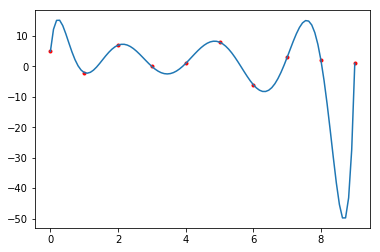

In [13]:
xs = np.linspace(0,9,100)
ys = sum([a[k]*xs**k for k in range(0,10)])
plt.plot(x,y,'r.',xs,ys)
plt.show()

This looks cool but it's over-fitting. If this was real-life data, we would want to take a polynomial with smaller degree (like a line) and fit it as best we can.

## Linear regression

Suppose we have $n+1$ points in the $xy$-plane and we want to fit a line $y=a_0 + a_1x$ that best fits the data. This is called [(least squares) linear regression](https://en.wikipedia.org/wiki/Linear_regression). We want to minimize the error 

$$
SSE = \sum_i (y_i - (a_0 + a_1 x_i))^2
$$

We need to solve

$$
X^TXa=X^Tb
$$

where $b = [y_0,y_1,\dots,y_n]^T$ and $a = [a_0,a_1]^T$ and

$$
X = 
\begin{bmatrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$